<a href="https://colab.research.google.com/github/vanshgurnani/Covid-Analysis/blob/main/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [415]:
df=pd.read_csv('COVID.csv',encoding='latin').drop([0], axis=0)
df.head(3)

,SR NO,REG NO,NAME OF THE PATIENT,AGE,SEX,HOSPITAL NAME,WAVE,DATE OF ADMISSION,DATE OF DISCHARGE,Duration of hospital stay IN DAYS,...,Steroid,Steroid Type,Steoid dose day,Steroid started on Day,Steroid Total Duration,LMWH Heparin,Length of ICU stay in days,Length of Hospital stay in days,Outcome in ICU,Inhospital outcome
1,2,994605,SSD,39,MALE,K N BAJAJ,FIRST,02-Oct-20,08-Oct-20,7,...,INJDEXA 6MG OD,MISSING,7DAYS,1,7DAYS,LMWH,7,7,7DAYS,MISSING
2,3,994109,PSR,35,MALE,K N BAJAJ,FIRST,28-Sep-20,05-Oct-20,8,...,Y,Dexa,4mg od,28.09.2020,8DAYS,LMWH,6,8,shift,DISCHARGED
3,4,994557,BCK,65,MALE,K N BAJAJ,FIRST,01-Oct-20,07-Oct-20,7,...,Y,DEXA,6 MG OD,1.10.2020,7DAYS,lMWH,4,7,shift,DISCHARGED


In [416]:
df=df.dropna()

In [417]:
df=df.drop(['NAME OF THE PATIENT','HOSPITAL NAME','SR NO','REG NO','COMPLAINTS','DIRECT BILIRUBIN',
            'HYPOTHYROIDISM','TOCI DAY from Admission','COVID19 POSITIVE NEGATIVE','PROCAL',
            'DIRECT BILIRUBIN','BAROTRUMA','barotrauma INCIDENCE','Toci Day from COVID symptoms','CKD','MALIGNANCY',
            'TOCI','RESPIRATORY DISORDERS','TYPE OF BAROTRAUMA','LMWH Heparin','INTUBATION Required','INTUBATION ON day from admission','HFNC NIV CPAP'
            ,'WAVE','Inhospital outcome','Outcome in ICU'],axis=1)

In [418]:
df['hb']=df['Hb'].replace(['MISSING'],0)
df['tlc']=df['TLC'].replace(['MISSING'],0)
df['crp']=df['CRP'].replace(['MISSING'],0)
df['d dimer']=df['D DIMER'].replace(['MISSING'],0)
df['creatinine']=df['CREATININE'].replace(['MISSING'],0)

df['il6']=df['IL6'].replace(['MISSING'],0)
df['ldh']=df['LDH'].replace(['MISSING'],0)
df['ferritin']=df['FERRITIN'].replace(['MISSING'],0)
df['total bilirubin']=df['Total Bilirubin'].replace(['MISSING'],0)
df['alt']=df['ALT'].replace(['MISSING'],0)
df['ast']=df['AST'].replace(['MISSING'],0)
df['albumin']=df['ALBUMIN'].replace(['MISSING'],0)

In [419]:
df=df.drop(['Hb','TLC','CRP','D DIMER','CREATININE','IL6','LDH','FERRITIN','Total Bilirubin','ALT','AST','ALBUMIN'],axis=1)

In [420]:
df['hb']=df['hb'].astype(str).astype(float)
df['tlc']=df['tlc'].astype(str).astype(float)
df['crp']=df['crp'].astype(str).astype(float)
df['d dimer']=df['d dimer'].astype(str).astype(float)
df['creatinine']=df['creatinine'].astype(str).astype(float)

df['il6']=df['il6'].astype(str).astype(float)
df['ldh']=df['ldh'].astype(str).astype(float)
df['ferritin']=df['ferritin'].astype(str).astype(float)
df['total bilirubin']=df['total bilirubin'].astype(str).astype(float)
df['alt']=df['alt'].astype(str).astype(float)
df['ast']=df['ast'].astype(str).astype(float)
df['albumin']=df['albumin'].astype(str).astype(float)

In [421]:
df['hb'].mean()
df['hb'] = df['hb'].replace([0],df['hb'].mean())

df['tlc'].mean()
df['tlc'] = df['tlc'].replace([0],df['tlc'].mean())

df['crp'].mean()
df['crp'] = df['crp'].replace([0],df['crp'].mean())

df['d dimer'].mean()
df['d dimer'] = df['d dimer'].replace([0],df['d dimer'].mean())

df['creatinine'].mean()
df['creatinine'] = df['creatinine'].replace([0],df['creatinine'].mean())

df['il6'].mean()
df['il6'] = df['il6'].replace([0],df['il6'].mean())

df['ldh'].mean()
df['ldh'] = df['ldh'].replace([0],df['ldh'].mean())

df['ferritin'].mean()
df['ferritin'] = df['ferritin'].replace([0],df['ferritin'].mean())

df['total bilirubin'].mean()
df['total bilirubin'] = df['total bilirubin'].replace([0],df['total bilirubin'].mean())


df['alt'].mean()
df['alt'] = df['alt'].replace([0],df['alt'].mean())

df['ast'].mean()
df['ast'] = df['ast'].replace([0],df['ast'].mean())

df['albumin'].mean()
df['albumin'] = df['albumin'].replace([0],df['albumin'].mean())

In [422]:
# df['HRCT_score']=df['HRCT_score'].apply(lambda x:)

In [423]:
df['hrct']=df['HRCT_score'].replace(['MISSING'],0)

In [424]:
df['hrct']=df['hrct'].apply(lambda x:str(x)[-2:])

In [425]:
df['hrct']=df['hrct'].replace(['ne'],0)

In [426]:
df['hrct']=df['hrct'].astype(str).astype(int)

In [427]:
df=df.drop(['HRCT_score'],axis=1)

In [428]:
df['doa']=pd.to_datetime(df['DATE OF ADMISSION'])
df['dod']=pd.to_datetime(df['DATE OF DISCHARGE'])

In [429]:
df['doam']=df['doa'].apply(lambda time:time.month)
df['doadw']=df['doa'].apply(lambda time:time.dayofweek)

df['dodm']=df['dod'].apply(lambda time:time.month)
df['doddw']=df['dod'].apply(lambda time:time.dayofweek)

In [430]:
print(df['doam'].value_counts())
print(df['doadw'].value_counts())
print(df['dodm'].value_counts())
print(df['doddw'].value_counts())

10    27
9     18
Name: doam, dtype: int64
4    14
5    10
0     6
1     5
2     4
3     3
6     3
Name: doadw, dtype: int64
10    43
9      1
1      1
Name: dodm, dtype: int64
1    10
3     8
0     8
4     7
5     7
2     5
Name: doddw, dtype: int64


<Axes: xlabel='doadw', ylabel='count'>

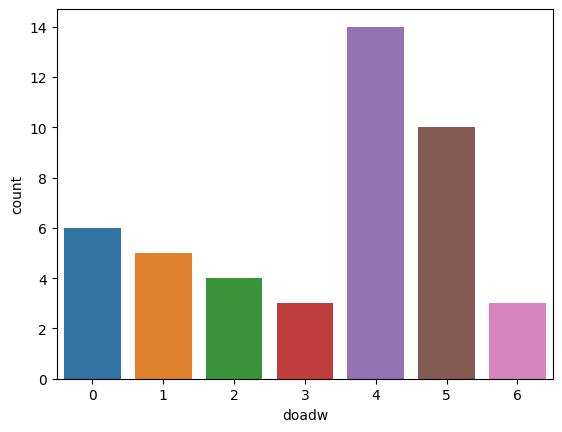

In [431]:
sns.countplot(x='doadw',data=df)

<Axes: xlabel='doddw', ylabel='count'>

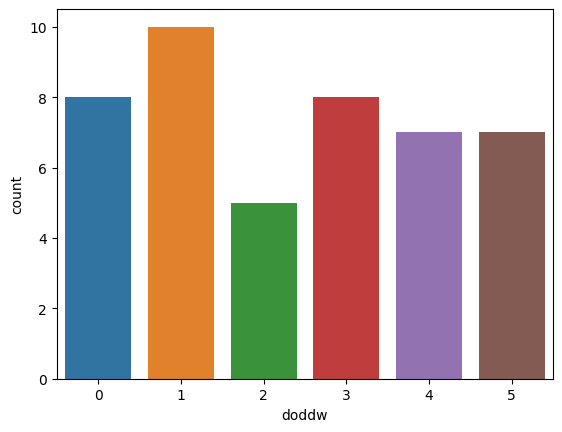

In [432]:
sns.countplot(x='doddw',data=df)

In [433]:
df=df.drop(['DATE OF ADMISSION','DATE OF DISCHARGE'],axis=1)

In [434]:
df['swab']=pd.to_datetime(df['SWAB SENT ON'])
df['swabm']=df['swab'].apply(lambda time:time.month)
df['swabdw']=df['swab'].apply(lambda time:time.dayofweek)
df=df.drop(['SWAB SENT ON'],axis=1)

print(df['swabm'].value_counts())
print(df['swabdw'].value_counts())

10    25
9     20
Name: swabm, dtype: int64
5    10
3     9
2     9
4     6
0     5
6     3
1     3
Name: swabdw, dtype: int64


<Axes: xlabel='swabdw', ylabel='count'>

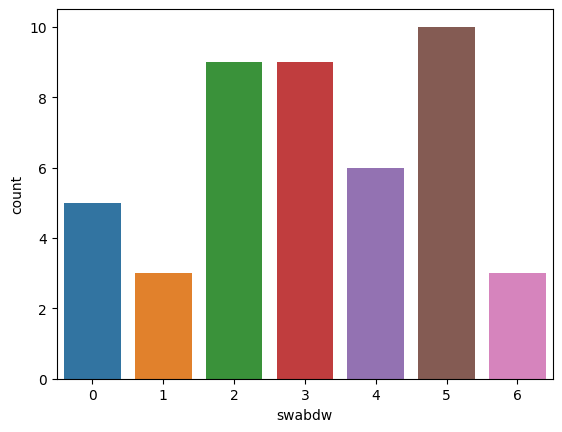

In [435]:
sns.countplot(x='swabdw',data=df)

In [436]:
df['Fever']=df['Fever'].replace(['MISSING'],'NO')

In [437]:
print(df['Fever'].value_counts())
print(df['Cough'].value_counts())
print(df['Sore throat'].value_counts())
print(df['Myalgia bodyache'].value_counts())
print(df['Breathlessness'].value_counts())

YES    39
NO      6
Name: Fever, dtype: int64
YES    33
NO     12
Name: Cough, dtype: int64
NO     31
YES    14
Name: Sore throat, dtype: int64
NO     38
YES     7
Name: Myalgia bodyache, dtype: int64
NO     25
YES    20
Name: Breathlessness, dtype: int64


In [438]:
df['Other symptoms'].value_counts()

N                            37
Y                             2
HEADACHE                      1
GIDDINESS                     1
ALTERED TASTE                 1
ALTERTED TASTE                1
LOSS OF TASTE                 1
WEAKNESS,LOSS OF APPETITE     1
Name: Other symptoms, dtype: int64

In [439]:
df['DM']=df['DM'].replace(['MISSING'],'NO')
df['DM'].value_counts()

NO     36
YES     9
Name: DM, dtype: int64

In [440]:
print(df['HTN'].value_counts())
df['IHD']=df['IHD'].replace(['MISSING'],'NO')
print(df['IHD'].value_counts())

NO     29
YES    16
Name: HTN, dtype: int64
NO     40
YES     5
Name: IHD, dtype: int64


In [441]:
df['lenICUstay']=df['Length of ICU stay in days'].replace(['NO','no','No'],0)
df=df.drop(['Length of ICU stay in days'],axis=1)

df['lenHOSstay']=df['Length of Hospital stay in days'].replace(['MISSING'],0)
df=df.drop(['Length of Hospital stay in days'],axis=1)

In [442]:
df['std']=df['Steroid Total Duration'].apply(lambda x:str(x).split('DAYS')[:1])

In [443]:
df['std']=df['std'].apply(lambda x:str(x).join(x))

In [444]:
df['std']=df['std'].replace(['NO'],0).replace(['09 days'],9)

In [445]:
df=df.drop(['Steroid Total Duration'],axis=1)

In [446]:
df['steroidtype']=df['Steroid Type'].replace(['MISSING'],'NO')
df=df.drop(['Steroid Type'],axis=1)

In [447]:
df['steroidtype'].value_counts()

DEXA                      24
Dexa                      12
NO                         6
INJ.METHYLPREDNISOLONE     1
INJ MPS                    1
METHYLPREDNISOLONE         1
Name: steroidtype, dtype: int64

In [448]:
df['Steroid']=df['Steroid'].replace(['Y','INJDEXA 6MG OD'],'YES')

In [449]:
df['Steroid'].value_counts()

YES    38
NO      7
Name: Steroid, dtype: int64

In [450]:
df=df.drop(['Steoid dose  day','Steroid started on Day'],axis=1)

In [451]:
df['COVID symptom start time before admission']=df['COVID symptom start time before admission'].replace(['MISSING'],'23.09.2020')

In [452]:
df['COVID symptom start time before admission']=pd.to_datetime(df['COVID symptom start time before admission'])

<ipython-input-452-ee02547426f3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['COVID symptom start time before admission']=pd.to_datetime(df['COVID symptom start time before admission'])


In [453]:
df['covid symp month']=df['COVID symptom start time before admission'].apply(lambda time:time.month)
df['covid symp dw']=df['COVID symptom start time before admission'].apply(lambda time:time.dayofweek)

In [454]:
df=df.drop(['COVID symptom start time before admission'],axis=1)

In [455]:
df['Fever'].value_counts()

YES    39
NO      6
Name: Fever, dtype: int64

In [456]:
df['Cough'].value_counts()

YES    33
NO     12
Name: Cough, dtype: int64

In [457]:
df['Sore throat'].value_counts()

NO     31
YES    14
Name: Sore throat, dtype: int64

In [458]:
df['Myalgia bodyache'].value_counts()

NO     38
YES     7
Name: Myalgia bodyache, dtype: int64

In [459]:
df['Breathlessness'].value_counts()

NO     25
YES    20
Name: Breathlessness, dtype: int64

In [460]:
df['Other symptoms']=df['Other symptoms'].replace(['HEADACHE','GIDDINESS','ALTERED TASTE','ALTERTED TASTE','LOSS OF TASTE','WEAKNESS,LOSS OF APPETITE'],'Y')

In [461]:
df['Other symptoms'].value_counts()

N    37
Y     8
Name: Other symptoms, dtype: int64

In [462]:
df['DM'].value_counts()

NO     36
YES     9
Name: DM, dtype: int64

In [463]:
df['HTN'].value_counts()

NO     29
YES    16
Name: HTN, dtype: int64

In [464]:
df['IHD'].value_counts()

NO     40
YES     5
Name: IHD, dtype: int64

In [465]:
df=df.drop(['SpO2 on admission','doa','dod','swab'],axis=1)

In [466]:
df['Oxygen requirement']=df['Oxygen requirement'].replace(['Y','4 Lit.','6LIT','8 LIT','50% FIO2','y'],'YES')

In [467]:
df['Oxygen requirement']=df['Oxygen requirement'].replace(['No'],'NO')

In [468]:
df['Oxygen requirement'].value_counts()

NO     23
YES    22
Name: Oxygen requirement, dtype: int64

In [469]:
df=df.drop(['Oxygen delivery mode','SEX'],axis=1)

In [470]:
df['Fever']=df['Fever'].replace('YES',1).replace('NO',0)
df['Fever'].value_counts()

1    39
0     6
Name: Fever, dtype: int64

In [471]:
df['Cough']=df['Cough'].replace('YES',1).replace('NO',0)
df['Cough'].value_counts()

1    33
0    12
Name: Cough, dtype: int64

In [472]:
df['Sore throat']=df['Sore throat'].replace('YES',1).replace('NO',0)
df['Sore throat'].value_counts()

0    31
1    14
Name: Sore throat, dtype: int64

In [473]:
df['Myalgia bodyache']=df['Myalgia bodyache'].replace('YES',1).replace('NO',0)
df['Myalgia bodyache'].value_counts()

0    38
1     7
Name: Myalgia bodyache, dtype: int64

In [474]:
df['Breathlessness']=df['Breathlessness'].replace('YES',1).replace('NO',0)
df['Breathlessness'].value_counts()

0    25
1    20
Name: Breathlessness, dtype: int64

In [475]:
df['Other symptoms']=df['Other symptoms'].replace('Y',1).replace('N',0)
df['Other symptoms'].value_counts()

0    37
1     8
Name: Other symptoms, dtype: int64

In [476]:
df['DM']=df['DM'].replace('YES',1).replace('NO',0)
df['DM'].value_counts()

0    36
1     9
Name: DM, dtype: int64

In [477]:
df['HTN']=df['HTN'].replace('YES',1).replace('NO',0)
df['HTN'].value_counts()

0    29
1    16
Name: HTN, dtype: int64

In [478]:
df['IHD']=df['IHD'].replace('YES',1).replace('NO',0)
df['IHD'].value_counts()

0    40
1     5
Name: IHD, dtype: int64

In [479]:
df['Oxygen requirement']=df['Oxygen requirement'].replace('YES',1).replace('NO',0)
df['Oxygen requirement'].value_counts()

0    23
1    22
Name: Oxygen requirement, dtype: int64

In [480]:
df['Steroid']=df['Steroid'].replace('YES',1).replace('NO',0)
df['Steroid'].value_counts()

1    38
0     7
Name: Steroid, dtype: int64

In [481]:
df['std']=df['std'].astype(str).astype(int)

In [482]:
df['lenICUstay']=df['lenICUstay'].astype(str).astype(int)

In [483]:
df['lenHOSstay']=df['lenHOSstay'].astype(str).astype(int)

In [484]:
df=df.drop(['steroidtype'],axis=1)

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 49
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AGE                                45 non-null     int64  
 1   Duration of hospital stay IN DAYS  45 non-null     int64  
 2   Fever                              45 non-null     int64  
 3   Cough                              45 non-null     int64  
 4   Sore throat                        45 non-null     int64  
 5   Myalgia bodyache                   45 non-null     int64  
 6   Breathlessness                     45 non-null     int64  
 7   Other symptoms                     45 non-null     int64  
 8   DM                                 45 non-null     int64  
 9   HTN                                45 non-null     int64  
 10  IHD                                45 non-null     int64  
 11  Oxygen requirement                 45 non-null     int64  
 

In [486]:
from sklearn.model_selection import train_test_split

In [487]:
X = df.drop('AGE',axis=1).values
y = df['AGE'].values

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [489]:
from sklearn.preprocessing import MinMaxScaler

In [490]:
scaler=MinMaxScaler()

In [491]:
X_train = scaler.fit_transform(X_train)

In [492]:
X_test = scaler.transform(X_test)

In [493]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [494]:
model=Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [495]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 3476.8533 - val_loss: 2110.7632
Epoch 2/25
1/1 [==============================] - 0s 195ms/step - loss: 3471.1770 - val_loss: 2100.3467
Epoch 3/25
1/1 [==============================] - 0s 194ms/step - loss: 3445.0571 - val_loss: 2090.8154
Epoch 4/25
1/1 [==============================] - 0s 80ms/step - loss: 3436.1912 - val_loss: 2082.1602
Epoch 5/25
1/1 [==============================] - 0s 94ms/step - loss: 3436.1558 - val_loss: 2073.4844
Epoch 6/25
1/1 [==============================] - 0s 80ms/step - loss: 3417.9358 - val_loss: 2064.3452
Epoch 7/25
1/1 [==============================] - 0s 56ms/step - loss: 3392.8584 - val_loss: 2055.1494
Epoch 8/25
1/1 [==============================] - 0s 66ms/step - loss: 3377.6921 - val_loss: 2045.6300
Epoch 9/25
1/1 [==============================] - 0s 77ms/step - loss: 3362.8799 - val_loss: 2035.5616
Epoch 10/25
1/1 [==============================] - 0s 82ms/step - loss: 3

In [496]:
from tensorflow.keras.models import load_model

In [497]:
model.save('project.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [498]:
loss=pd.DataFrame(model.history.history)

In [499]:
loss

,loss,val_loss
0,3476.853271,2110.763184
1,3471.177002,2100.346680
2,3445.057129,2090.815430
3,3436.191162,2082.160156
4,3436.155762,2073.484375
5,3417.935791,2064.345215
6,3392.858398,2055.149414
7,3377.692139,2045.630005
8,3362.879883,2035.561646
9,3359.848389,2024.997803


<Axes: >

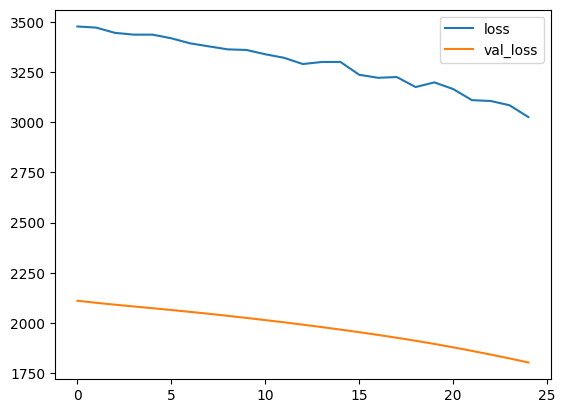

In [500]:
loss[['loss','val_loss']].plot()

In [501]:
from sklearn.metrics import classification_report,confusion_matrix

In [502]:
predict=model.predict(X_test)
classes=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 118ms/step


In [503]:
print(confusion_matrix(y_test,classes))

[[0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


In [504]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new = df.drop('AGE',axis=1).iloc[random_ind]
new

Duration of hospital stay IN DAYS      10.000
Fever                                   1.000
Cough                                   1.000
Sore throat                             0.000
Myalgia bodyache                        1.000
Breathlessness                          0.000
Other symptoms                          0.000
DM                                      1.000
HTN                                     0.000
IHD                                     0.000
Oxygen requirement                      0.000
Steroid                                 1.000
hb                                     12.100
tlc                                  6200.000
crp                                    22.100
d dimer                               200.000
creatinine                              1.100
il6                                     5.302
ldh                                   100.000
ferritin                               80.000
total bilirubin                         0.800
alt                               

In [505]:
# Apply the same scaling to new as you did to X_train
new_scaled = scaler.transform(new.values.reshape(1, 36))

# Make a prediction
prediction = model.predict(new_scaled)

# Print the predicted age
print(prediction)


1/1 [==============================] - 0s 39ms/step
[[3.9001935]]
